<h1 align="center">ML For Defect Analysis</h1> 

## 1. Building the Model

In [30]:
import warnings
warnings.filterwarnings('ignore')

import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
#Split the data into train, validation & test

import splitfolders  

input_folder = 'Data'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output="Data_split", 
                   seed=42, ratio=(.75, .2, .05), 
                   group_prefix=None)

Copying files: 732 files [00:00, 838.90 files/s]


In [32]:
train_dir = os.path.join(os.getcwd(), 'Data_split\\train')
validation_dir = os.path.join(os.getcwd(), 'Data_split\\val')

In [33]:
# Directory with our training 'proper' pictures
train_proper_dir = os.path.join(train_dir, 'proper')

# Directory with our training 'defective' pictures
train_defective_dir = os.path.join(train_dir, 'defective')

# Directory with our validation 'proper' pictures
validation_proper_dir = os.path.join(validation_dir, 'proper')

# Directory with our validation 'defective' pictures
validation_defective_dir = os.path.join(validation_dir, 'defective')

In [34]:
# The model has already been trained. Run this codeblock only to re-train the model. 

'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
'''

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),\n    tf.keras.layers.MaxPooling2D(2, 2),\n    \n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    \n    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    \n    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Dropout(0.5),\n    \n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n"

In [35]:
# The model has already been trained. Run this codeblock only to re-train the model. 
'''
#Compiling the model

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
'''

"\n#Compiling the model\n\nmodel.compile(loss='binary_crossentropy',\n              optimizer=RMSprop(lr=1e-4),\n              metrics=['accuracy'])\n"

In [36]:
# The model has already been trained. Run this codeblock only to re-train the model. 

'''
# Image Augmentation

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
'''

"\n# Image Augmentation\n\ntrain_datagen = ImageDataGenerator(\n      rescale=1./255,\n      rotation_range=40,\n      width_shift_range=0.2,\n      height_shift_range=0.2,\n      shear_range=0.2,\n      zoom_range=0.2,\n      horizontal_flip=True,\n      fill_mode='nearest')\n\ntest_datagen = ImageDataGenerator(rescale=1./255)\n"

In [37]:
# The model has already been trained. Run this codeblock only to re-train the model. 

'''
# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        class_mode='binary')

# Flow validation images in batches of 16 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')
'''

"\n# Flow training images in batches of 16 using train_datagen generator\ntrain_generator = train_datagen.flow_from_directory(\n        train_dir,  # This is the source directory for training images\n        target_size=(150, 150),  # All images will be resized to 150x150\n        batch_size=16,\n        class_mode='binary')\n\n# Flow validation images in batches of 16 using test_datagen generator\nvalidation_generator = test_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(150, 150),\n        batch_size=16,\n        class_mode='binary')\n"

In [42]:
# The model has already been trained. Run this codeblock only to re-train the model. 
'''

history = model.fit(
      train_generator,
      steps_per_epoch=50,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=30,  # 1000 images = batch_size * steps
      verbose=2)
'''

Epoch 1/20
50/50 - 28s - loss: 0.6771 - acc: 0.5602 - val_loss: 0.6132 - val_acc: 0.7055
Epoch 2/20
50/50 - 27s - loss: 0.6269 - acc: 0.6738 - val_loss: 0.6532 - val_acc: 0.6370
Epoch 3/20
50/50 - 28s - loss: 0.5918 - acc: 0.7143 - val_loss: 0.5945 - val_acc: 0.6986
Epoch 4/20
50/50 - 30s - loss: 0.5846 - acc: 0.6967 - val_loss: 0.6047 - val_acc: 0.6781
Epoch 5/20
50/50 - 28s - loss: 0.5836 - acc: 0.7173 - val_loss: 0.5945 - val_acc: 0.6849
Epoch 6/20
50/50 - 30s - loss: 0.5642 - acc: 0.7111 - val_loss: 0.6082 - val_acc: 0.7055
Epoch 7/20
50/50 - 30s - loss: 0.5553 - acc: 0.7356 - val_loss: 0.5847 - val_acc: 0.7329
Epoch 8/20
50/50 - 35s - loss: 0.5416 - acc: 0.7431 - val_loss: 0.6069 - val_acc: 0.7260
Epoch 9/20
50/50 - 34s - loss: 0.5535 - acc: 0.7312 - val_loss: 0.5511 - val_acc: 0.7192
Epoch 10/20
50/50 - 35s - loss: 0.5308 - acc: 0.7399 - val_loss: 0.5909 - val_acc: 0.7055
Epoch 11/20
50/50 - 36s - loss: 0.5516 - acc: 0.7243 - val_loss: 0.5463 - val_acc: 0.7534
Epoch 12/20
50/50 -

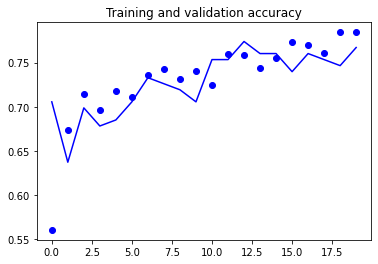

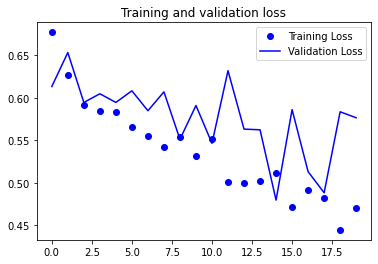

In [45]:
#This will work only if you have run the previous codeblocks

'''
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
'''

In [43]:
#Saving the model

#model.save('model.h5')   Current best model has train_acc = 82.75 and val_acc = 84.93                

## 2. Loading The Model

In [38]:
import warnings
warnings.filterwarnings("ignore")

import os
import tensorflow as tf
from IPython.display import Image, display
from tensorflow.keras.models import load_model

new_model = load_model('model_tacc8275_val8493.h5')

In [39]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

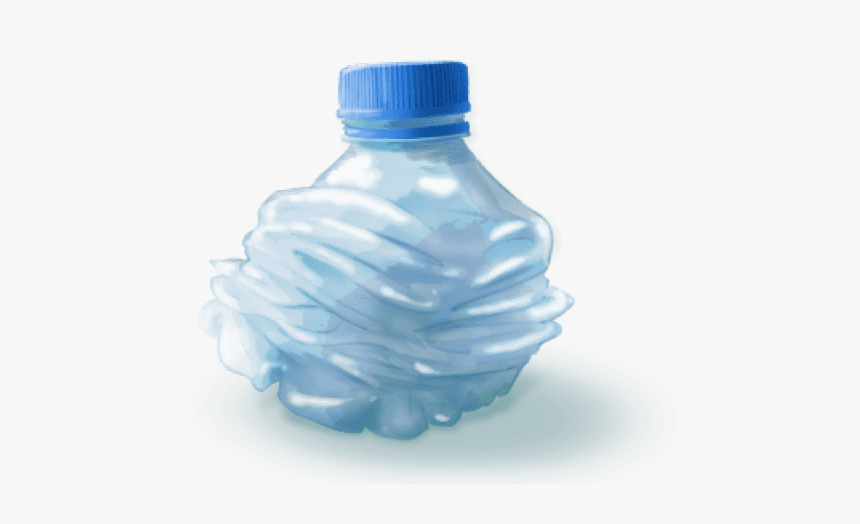

In [40]:
img_path = os.path.join(os.getcwd(), 'Data\\Defective\\Defective (5).jpg')
display(Image(filename=img_path))

listOfImageNames = [img_path]

In [41]:
#For multiple images
'''
from IPython.display import Image, display

listOfImageNames = [os.path.join(os.getcwd(), 'Data\\Defective\\Defective (1).jpg'),
                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (2).jpg'),
                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (3).jpg'),
                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (4).jpg'),
                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (5).jpg'),
                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (6).jpg'),
                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (7).jpg'),
                    ]

for imageName in listOfImageNames:
    display(Image(filename=imageName))
'''

"\nfrom IPython.display import Image, display\n\nlistOfImageNames = [os.path.join(os.getcwd(), 'Data\\Defective\\Defective (1).jpg'),\n                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (2).jpg'),\n                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (3).jpg'),\n                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (4).jpg'),\n                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (5).jpg'),\n                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (6).jpg'),\n                    os.path.join(os.getcwd(), 'Data\\Defective\\Defective (7).jpg'),\n                    ]\n\nfor imageName in listOfImageNames:\n    display(Image(filename=imageName))\n"

In [42]:
import numpy as np
from keras.preprocessing import image

In [43]:
#for single image

path = img_path
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = new_model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
    print("Bottle is Defective")
else:
    print("Bottle is Proper")

[0.]
Bottle is Defective


In [44]:
#for multiple images

'''
for fn in listOfImageNames:
 
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = new_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print("Bottle is proper")
    else:
        print("Bottle is defective")
'''

'\nfor fn in listOfImageNames:\n \n    path = fn\n    img = image.load_img(path, target_size=(150, 150))\n    x = image.img_to_array(img)\n    x = np.expand_dims(x, axis=0)\n\n    images = np.vstack([x])\n    classes = new_model.predict(images, batch_size=10)\n    print(classes[0])\n    if classes[0]>0.5:\n        print("Bottle is proper")\n    else:\n        print("Bottle is defective")\n'